In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout     
import warnings
warnings.filterwarnings("ignore")

# Q1) Predict the Burned Area of Forest Fire with Neural Networks

In [2]:
# Reading the dataset
df = pd.read_csv(r"C:\Users\shrut\Downloads\forestfires (1).csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [3]:
#Row*coloumns 
df.shape

(517, 31)

In [4]:
#checking the Null values 
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#columns of Dataset 
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
#showing unique values 
df.size_category.unique()

array(['small', 'large'], dtype=object)

In [8]:
#count of unique values 
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

# Data Visualization

,size_category,counts
0,small,378
1,large,139


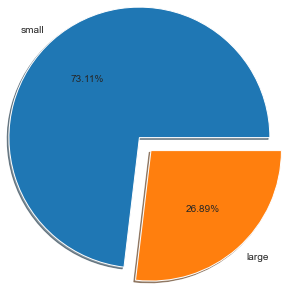

In [9]:
#Target variable
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})
     
plt.pie(y_count.counts, labels=y_count['size_category'], shadow = True, autopct='%1.2f%%', explode=(0,0.2), radius=1.5)
y_count

In [10]:
#Other features with target variable
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

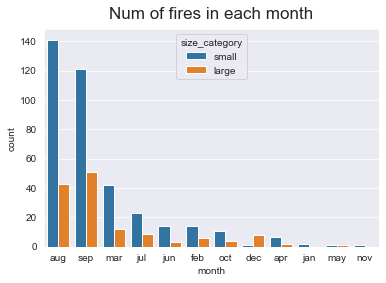

In [11]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

# Observation:

* August month has seen highest number of small fires.
* Whereas sep month has seen highest number of large fires.
* Least number of fires occured in month of nov.

In [12]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

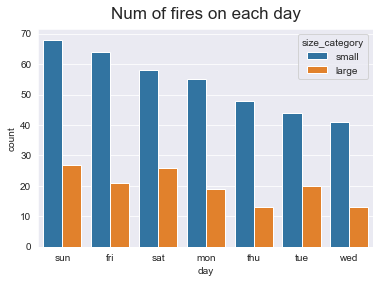

In [13]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

# Observation:

* Highest number of small as well as large fires have occured on a Sunday.
* Lowest number of small fires have occured on a Wednesday.
* Lowest number of large fires have occured on a Wednesday and Thursday.

# Label Encoder

In [14]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']    #1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [15]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

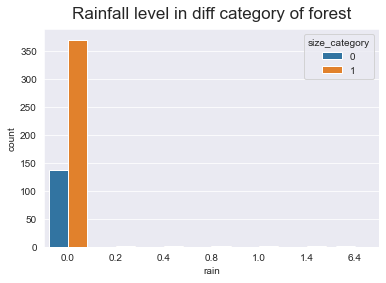

In [16]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

# Observation:

* 0 represents large forest fire, 1 represents small forest fire.
* Majority of the forests have almost no rainfall.
* Highest rainfall a forest has was of 6.4 and it comes under a large forest fire catogory.

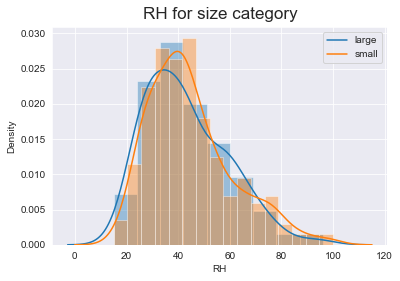

In [17]:
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])             #orange for small fire, blue for small fire
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

* Fairly normal data.
* Will have to check for outliers with diff method.

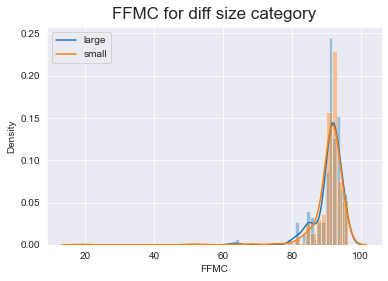

In [18]:
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])                 #orange for small fire, blue for small fire
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

* Highly skewed data.
* There are definitly outliers in this variable.

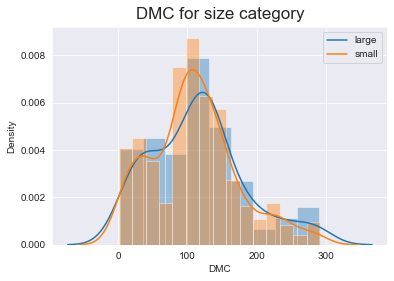

In [19]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])             #orange for small fire, blue for large fire
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

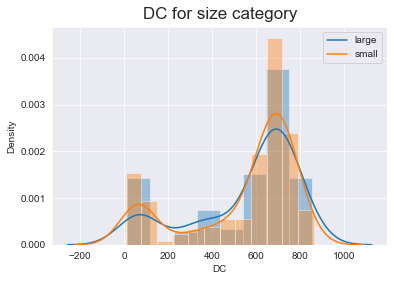

In [20]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])              #orange for small fire, blue for large fire
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

* Highly skewed data.
* Outliers are present.

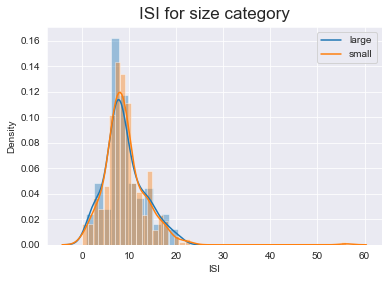

In [21]:
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

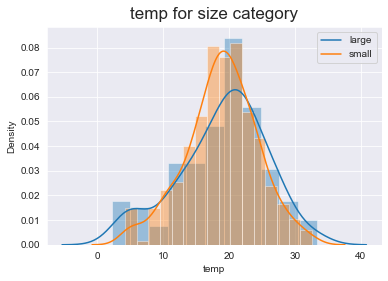

In [22]:
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

* Fairly Normal distribution.
* Large forest fire has slighly higher temp than small forest fires.

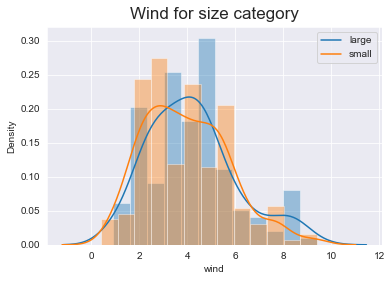

In [23]:
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

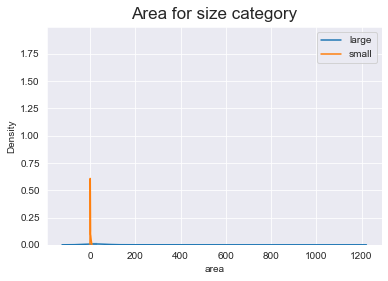

In [24]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

* Large the forest area, larger the fire. So we can see, large area forest are coming under large forest fire category.

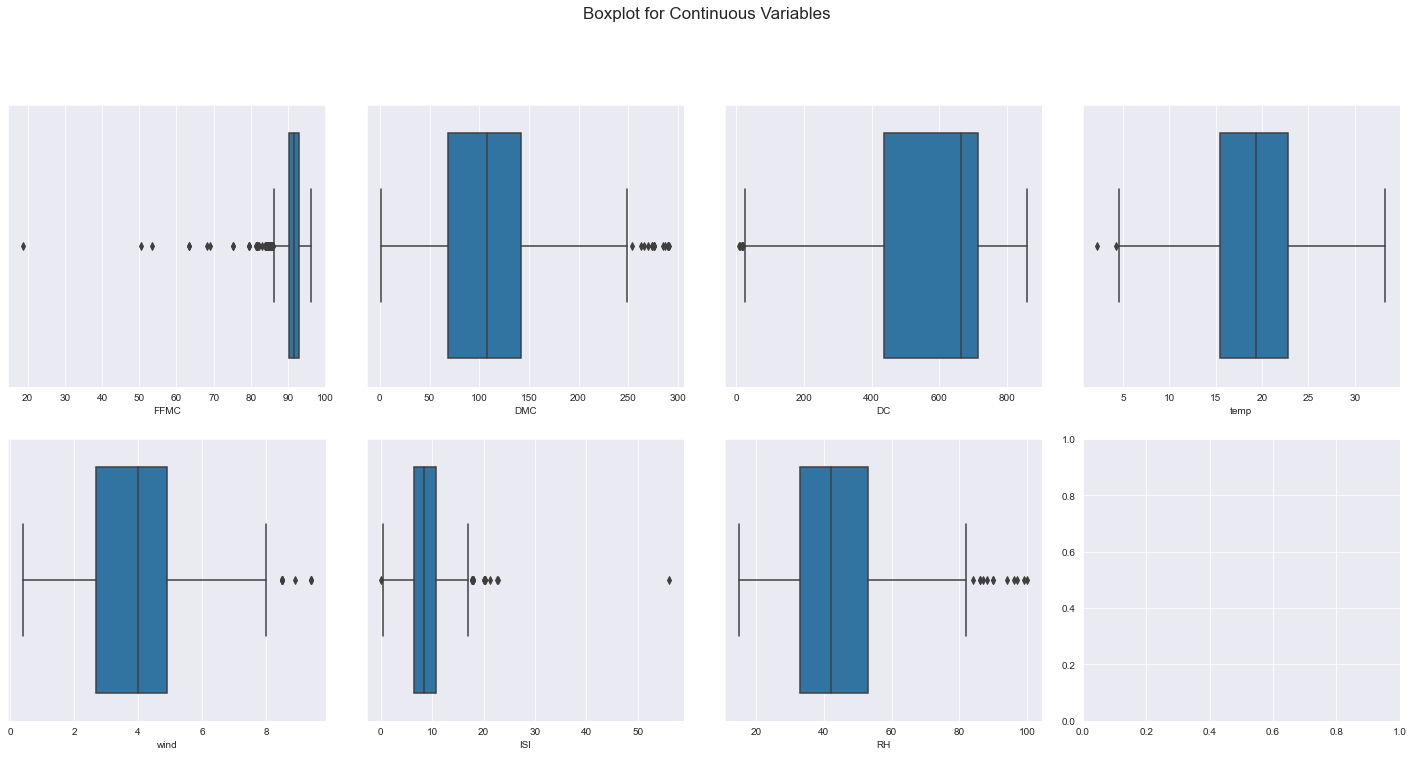

In [25]:
#check for outliers
fig, ax=plt.subplots(2,4, figsize=(20,10), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

* We do have a very noisy data.

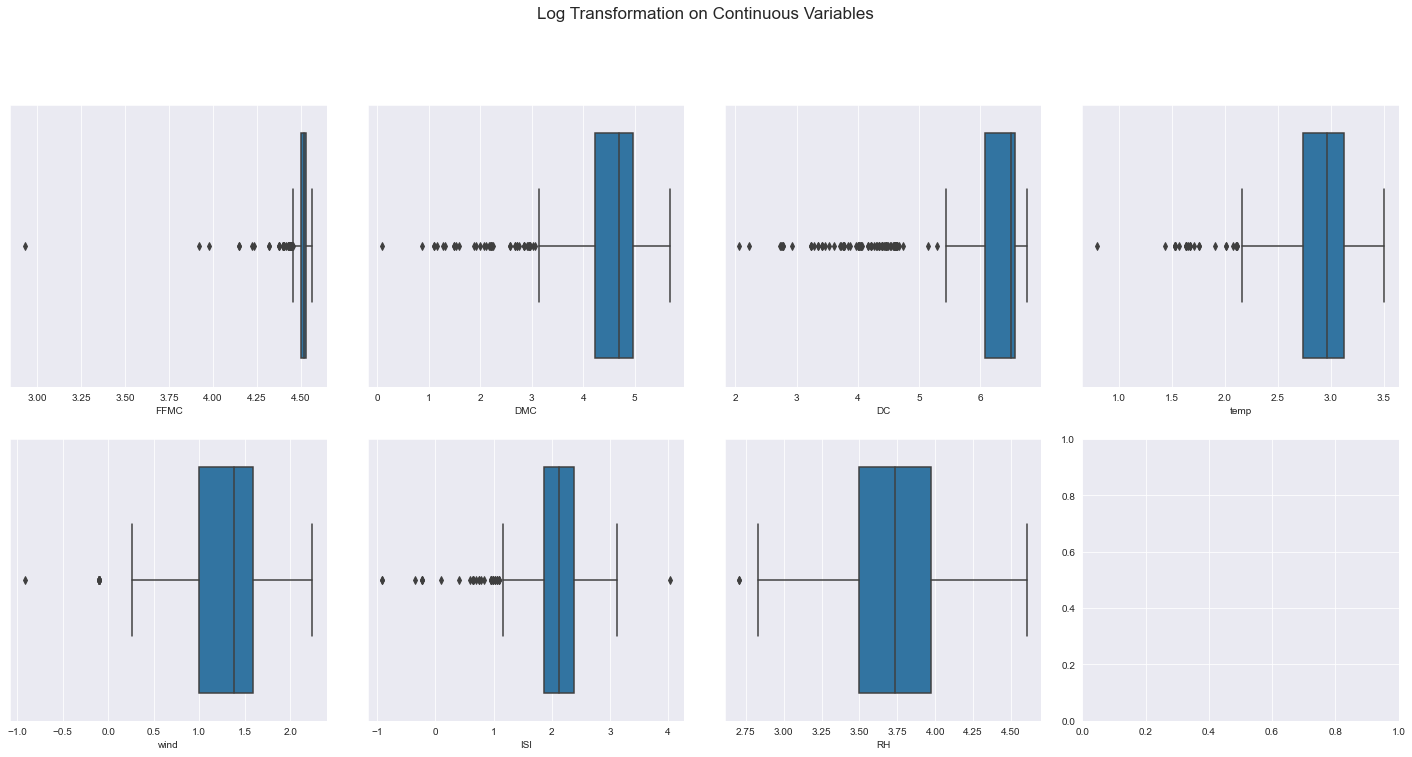

In [26]:
#Let's try to treat outliers by log tranformations
fig, ax=plt.subplots(2,4, figsize=(20,10), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)


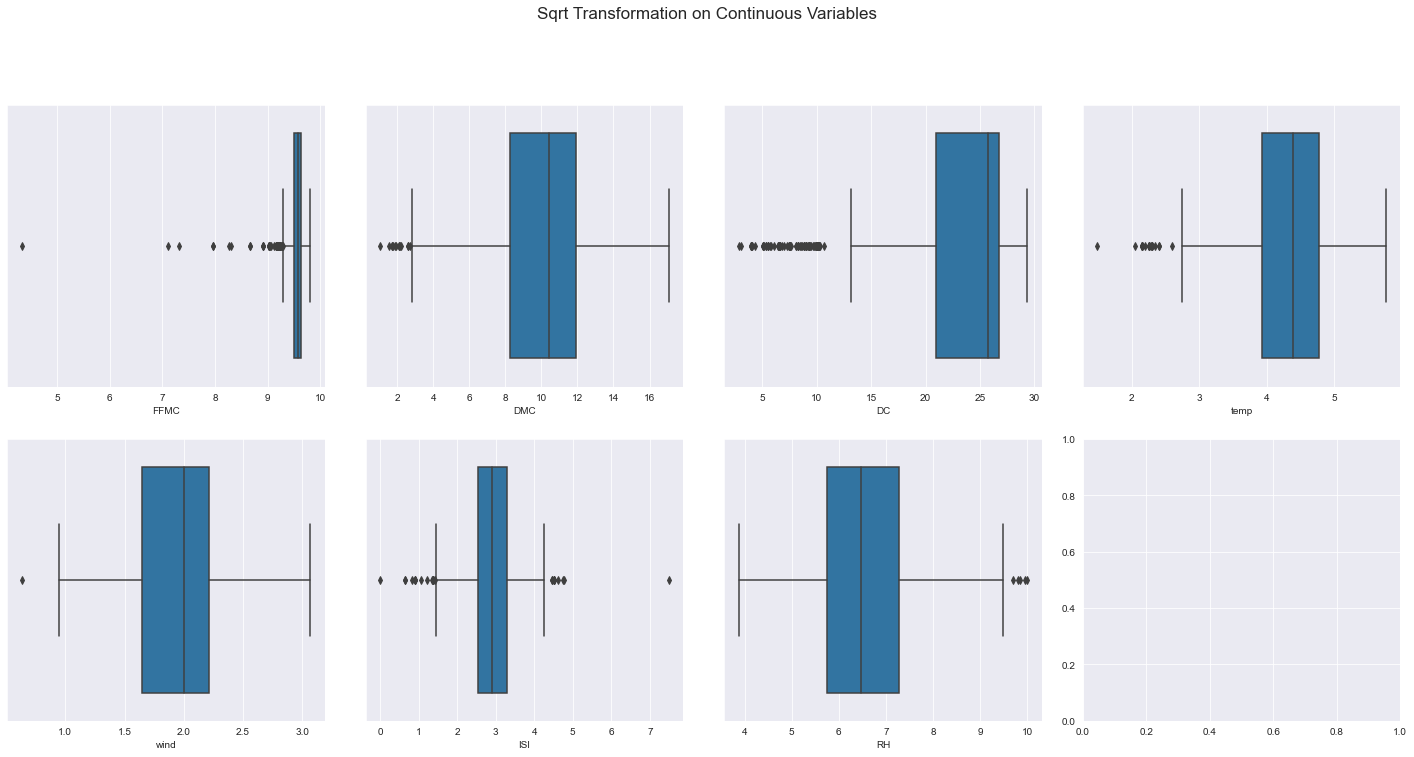

In [27]:
#Let's try to treat outliers by sqrt tranformations
fig, ax=plt.subplots(2,4, figsize=(20,10), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)
     

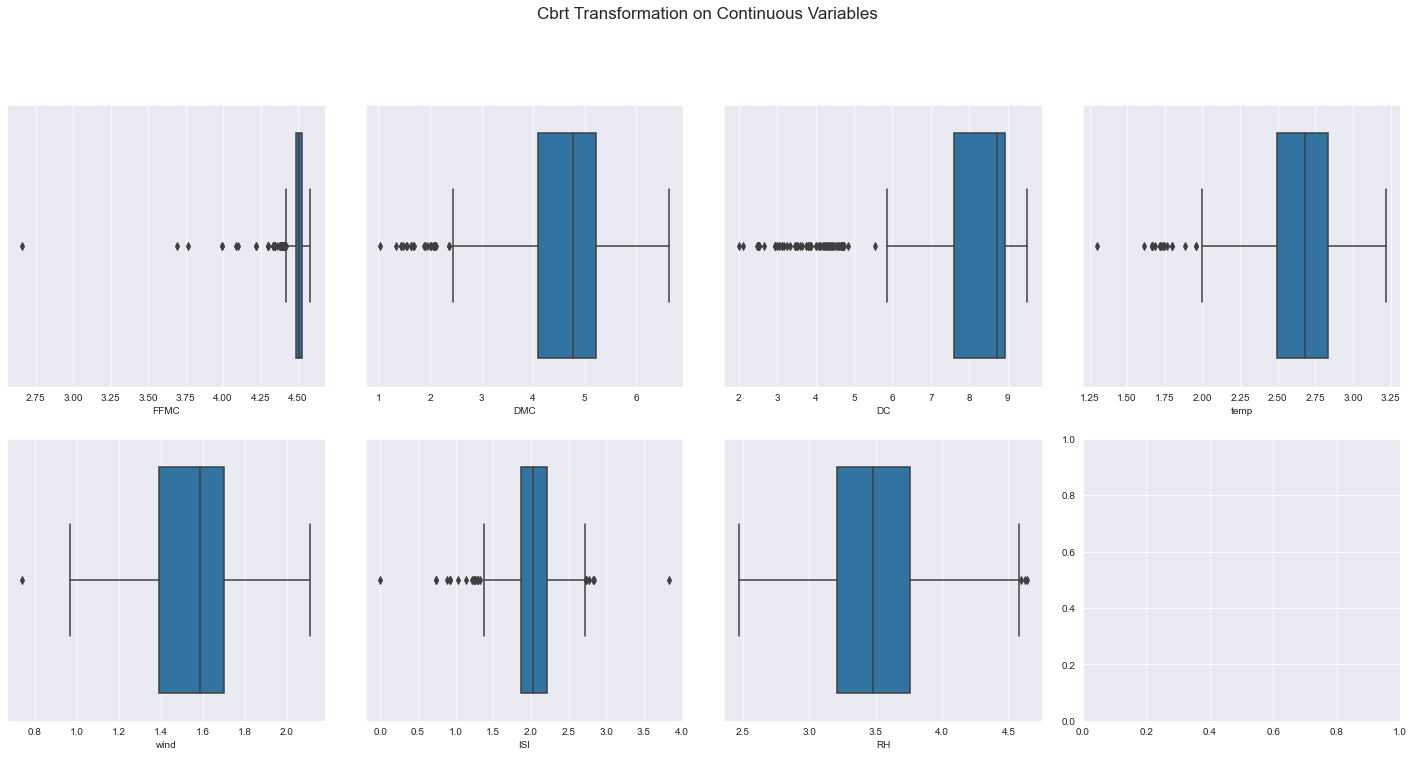

In [28]:
#Let's try to treat outliers by cbrt tranformations
fig, ax=plt.subplots(2,4, figsize=(20,10), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

None of them were helpful to treat outliers in any of the features.

# Dependency of Target variable on diff Features

In [29]:
#to get correlation of target variable with numerical columns
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [30]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

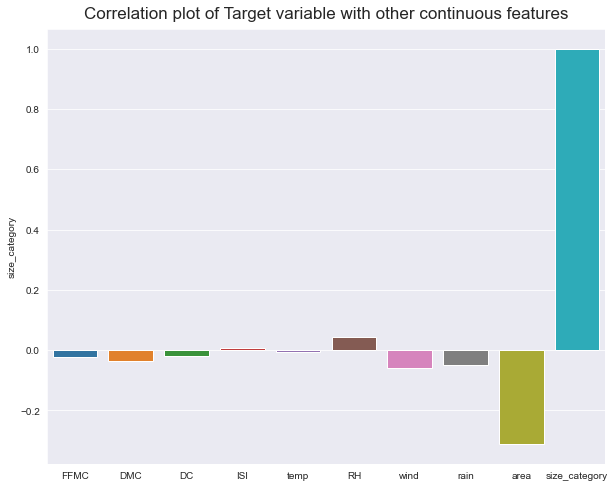

In [31]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Size category and area of forest have highest correlation followed by others.

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

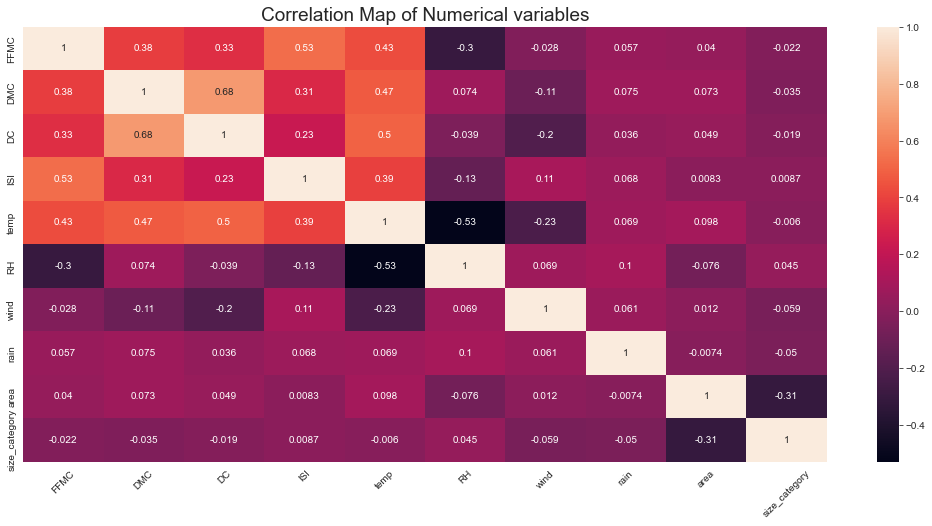

In [32]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

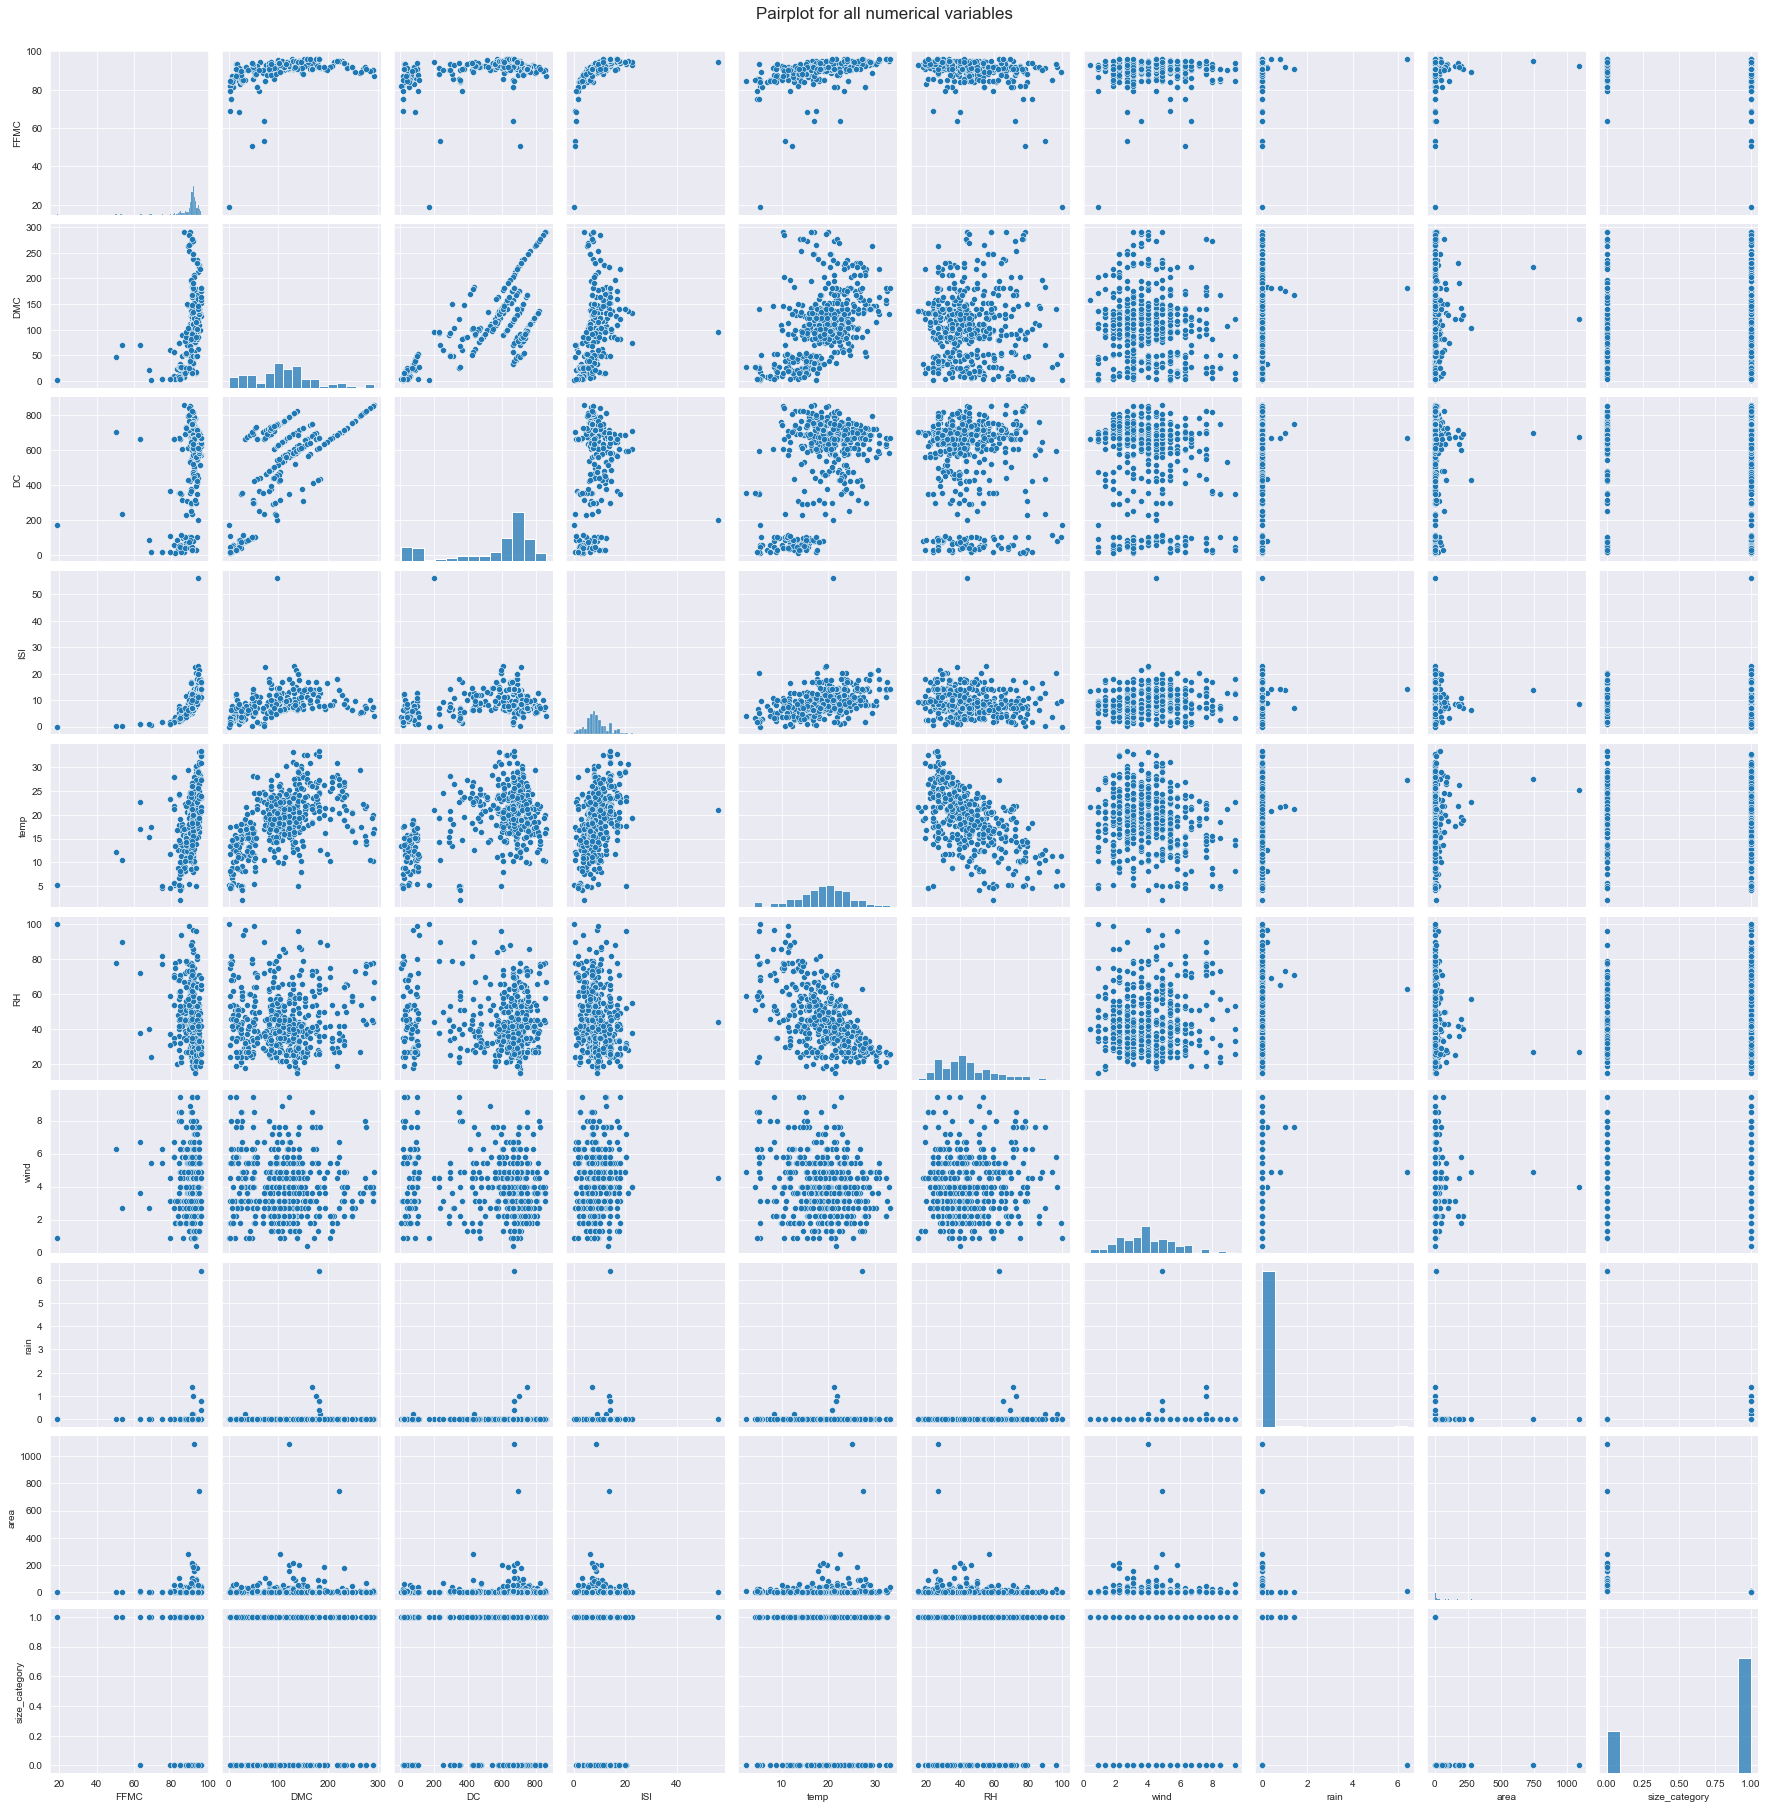

In [33]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

We can get insights from last row of the plots for our prediction model.

# Data Preprocessing

In [34]:
#drop the unnecessary columns
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
     

pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


Outliers dataset gives the outliers in our data, and we need to remove these to improve our model.

In [36]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [37]:
df.shape

(517, 27)

# Splitting data into target variable and independent variables

In [38]:
x = df.drop('size_category', axis=1)
y = df['size_category']

# Converting independent features into normalised and standardized data

In [39]:
#Standardize & Normalize the data
norm = MinMaxScaler()
std = StandardScaler()
x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)     #data between -3 to +3
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)       #data between -1 to +1
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


# Creating train and test data for model validation

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [41]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

# Model building

In [42]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [43]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.962 total time=   1.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.923 total time=   0.7s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.909 total time=   0.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.792 total time=   0.6s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.948 total time=   0.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.896 total time=   1.1s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................
[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.857 total time=   1.1s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................
[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.935 total time=   1.1s


In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9429903268814087, using {'batch_size': 20, 'epochs': 50}
0.9067932009696961,0.06016574080696389 with: {'batch_size': 10, 'epochs': 10}
0.9327339291572571,0.019305971073901917 with: {'batch_size': 10, 'epochs': 50}
0.9145854115486145,0.04557458778504901 with: {'batch_size': 10, 'epochs': 100}
0.8629703521728516,0.06302140518916695 with: {'batch_size': 20, 'epochs': 10}
0.9429903268814087,0.04244030277457041 with: {'batch_size': 20, 'epochs': 50}
0.9248418211936951,0.055437854881732675 with: {'batch_size': 20, 'epochs': 100}
0.7566433548927307,0.07813002818794211 with: {'batch_size': 40, 'epochs': 10}
0.9223443150520325,0.043603275839657764 with: {'batch_size': 40, 'epochs': 50}
0.9274059176445008,0.046288825070437384 with: {'batch_size': 40, 'epochs': 100}


In [45]:
#get best value for learning rate and dropuout by hyperparameter tuning
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 26,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.974 total time=   3.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.962 total time=   2.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.935 total time=   2.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.909 total time=   2.4s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=   2.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [46]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9533799529075623, using {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9482184410095215,0.023362757190487495 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9301032185554504,0.029287823362294834 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7283383131027221,0.08256760688681798 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9533799529075623,0.031363604963366064 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9351981282234192,0.041174148568053986 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7413586497306823,0.04224296950872041 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9430236458778382,0.03358194056684733 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9301032304763794,0.03150724040435202 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7335664391517639,0.053423297567632214 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [47]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.859 total time=   2.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.859 total time=   2.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.805 total time=   2.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.701 total time=   2.9s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.727 total time=   2.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.974 total time=   2.3s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.935 total time=   2.3s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.987 total time=   2.3s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.974 total time=   2.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.949 total time=   2.6s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.961 total time=   2.3s
[CV 4/5; 11/12] START activation_f

In [48]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9664002537727356, using {'activation_function': 'tanh', 'init': 'normal'}
0.7903429865837097,0.06564729744240114 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.8033966064453125,0.05714215904487877 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7567099690437317,0.06536198500228904 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9429570317268372,0.04972817475201813 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9378288269042969,0.051649583262657575 with: {'activation_function': 'relu', 'init': 'normal'}
0.7335664391517639,0.053423297567632214 with: {'activation_function': 'relu', 'init': 'zero'}
0.9638028502464294,0.017255595421576418 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9664002537727356,0.013245887987142645 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7335664391517639,0.053423297567632214 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9664002537727356,0.017617708424686865 with: {'act

In [49]:
# Defining the model
#get best value for neuron by hyperparameter tuning

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.987 total time=   2.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.962 total time=   2.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.948 total time=   2.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.896 total time=   2.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=   2.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [50]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9689976572990417, using {'neuron1': 16, 'neuron2': 2}
0.9533799409866333,0.03144569006357418 with: {'neuron1': 4, 'neuron2': 2}
0.9612054467201233,0.014288787059347052 with: {'neuron1': 4, 'neuron2': 4}
0.9638028502464294,0.015175326110777739 with: {'neuron1': 4, 'neuron2': 8}
0.9664002537727356,0.017617708424686865 with: {'neuron1': 8, 'neuron2': 2}
0.9612054467201233,0.02177222172324334 with: {'neuron1': 8, 'neuron2': 4}
0.9612054467201233,0.014288787059347052 with: {'neuron1': 8, 'neuron2': 8}
0.9689976572990417,0.021081954803429722 with: {'neuron1': 16, 'neuron2': 2}
0.9638028502464294,0.022364049850310163 with: {'neuron1': 16, 'neuron2': 4}
0.9664002537727356,0.01039175143001667 with: {'neuron1': 16, 'neuron2': 8}


In [51]:
# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [52]:
# Predicting train accuracy using trained model
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

13/13 [==============================] - 0s 568us/step
Train Accuracy: 0.9948320413436692


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       103
           1       1.00      1.00      1.00       284

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387



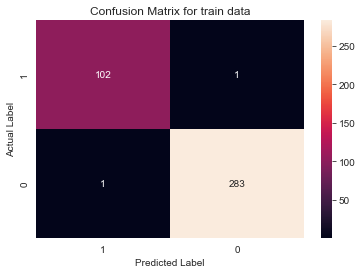

In [53]:
# plot confusion matrix to describe the performance of classifier.
cm_df=confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
print(classification_report(y_train, y_hat))
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [54]:
# Predicting test accuracy using trained model
y_predict = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test,y_predict))

5/5 [==============================] - 0s 913us/step
Test Accuracy: 0.9538461538461539


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.97      0.97      0.97        94

    accuracy                           0.95       130
   macro avg       0.94      0.94      0.94       130
weighted avg       0.95      0.95      0.95       130



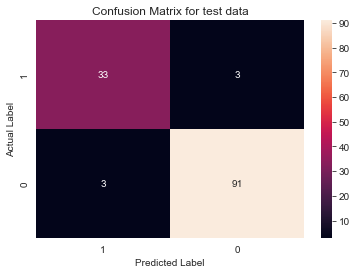

In [55]:
# plot confusion matrix to describe the performance of classifier.

cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
print(classification_report(y_test, y_predict))
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Conclusion
* The train accuracy for the model is 0.9896 and test accuracy for the model is 0.9461
* Both train and test accuracies are comparable and good and hence is a good model to predict.

# Q 2) Predict turbine energy yield (TEY) using ambient variables as features

In [56]:
turbines_data = pd.read_csv(r"C:\Users\shrut\Downloads\gas_turbines (1).csv")
turbines_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [57]:
turbines_data.shape

(15039, 11)

In [58]:
turbines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [59]:
turbines_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [60]:
turbines_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [61]:
turbines_data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

# Data Visualization

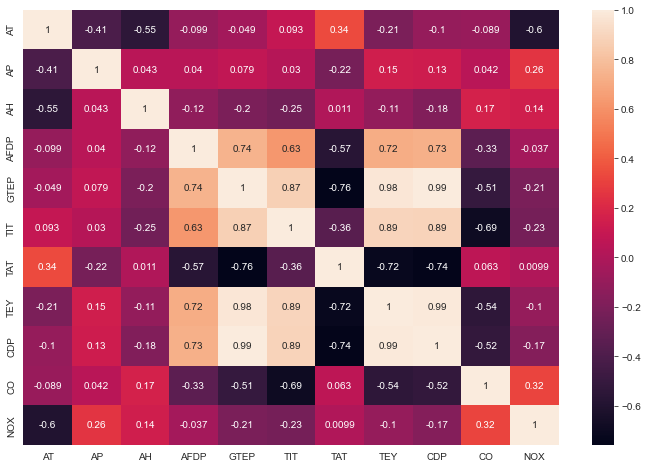

In [62]:
# Correlation Matrix
plt.figure(figsize = (12,8))
sns.heatmap(turbines_data.corr(),annot = True)
plt.show()

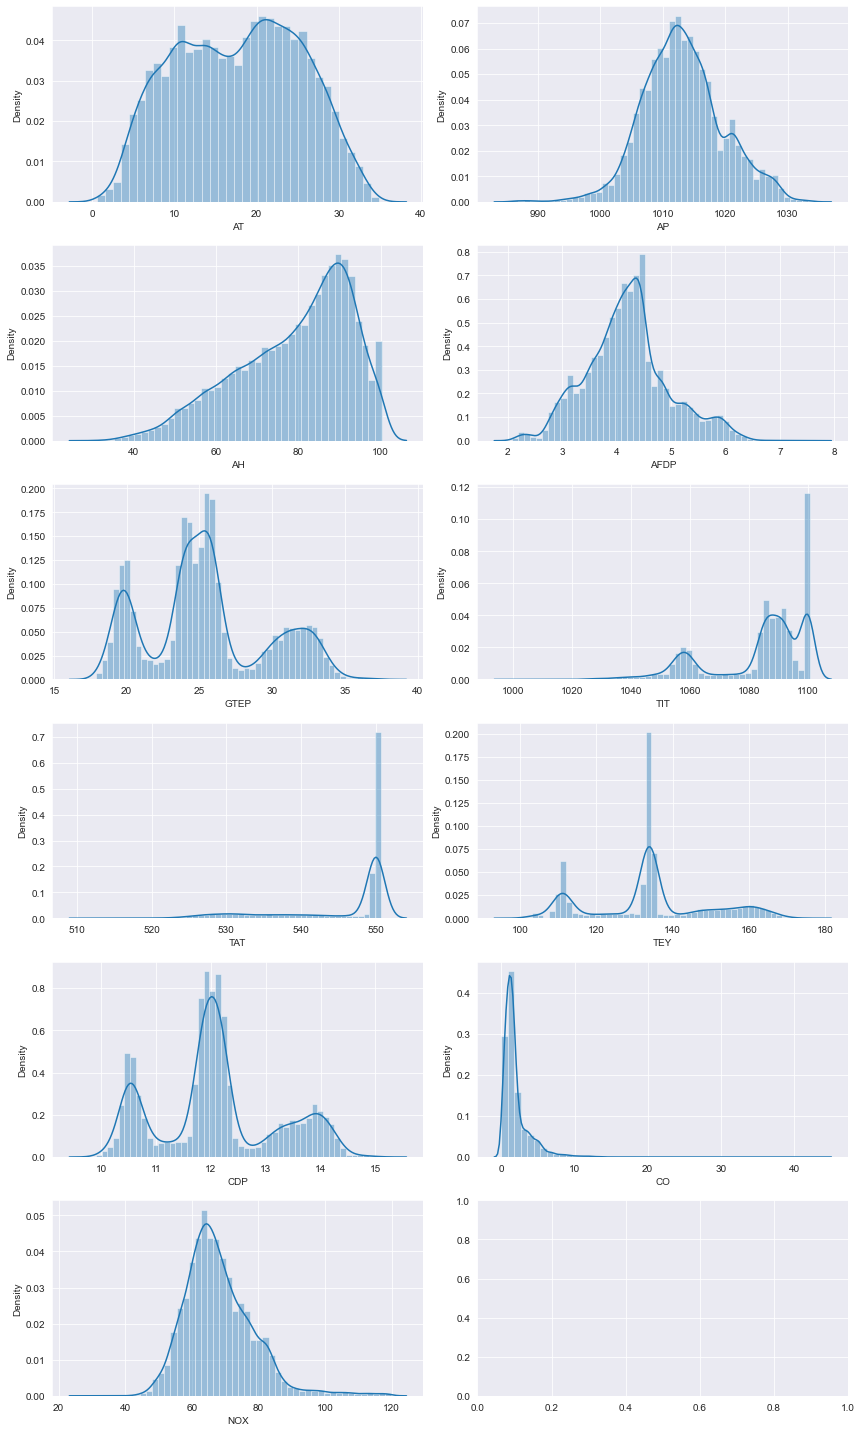

In [63]:
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.distplot(turbines_data.AT, ax = ax[0,0])
sns.distplot(turbines_data.AP, ax = ax[0,1])
sns.distplot(turbines_data.AH, ax = ax[1,0])
sns.distplot(turbines_data.AFDP, ax = ax[1,1])
sns.distplot(turbines_data.GTEP, ax = ax[2,0])
sns.distplot(turbines_data.TIT, ax = ax[2,1])
sns.distplot(turbines_data.TAT, ax = ax[3,0])
sns.distplot(turbines_data.TEY, ax = ax[3,1])
sns.distplot(turbines_data.CDP, ax = ax[4,0])
sns.distplot(turbines_data.CO, ax = ax[4,1])
sns.distplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

We can see that the data is very noisy.

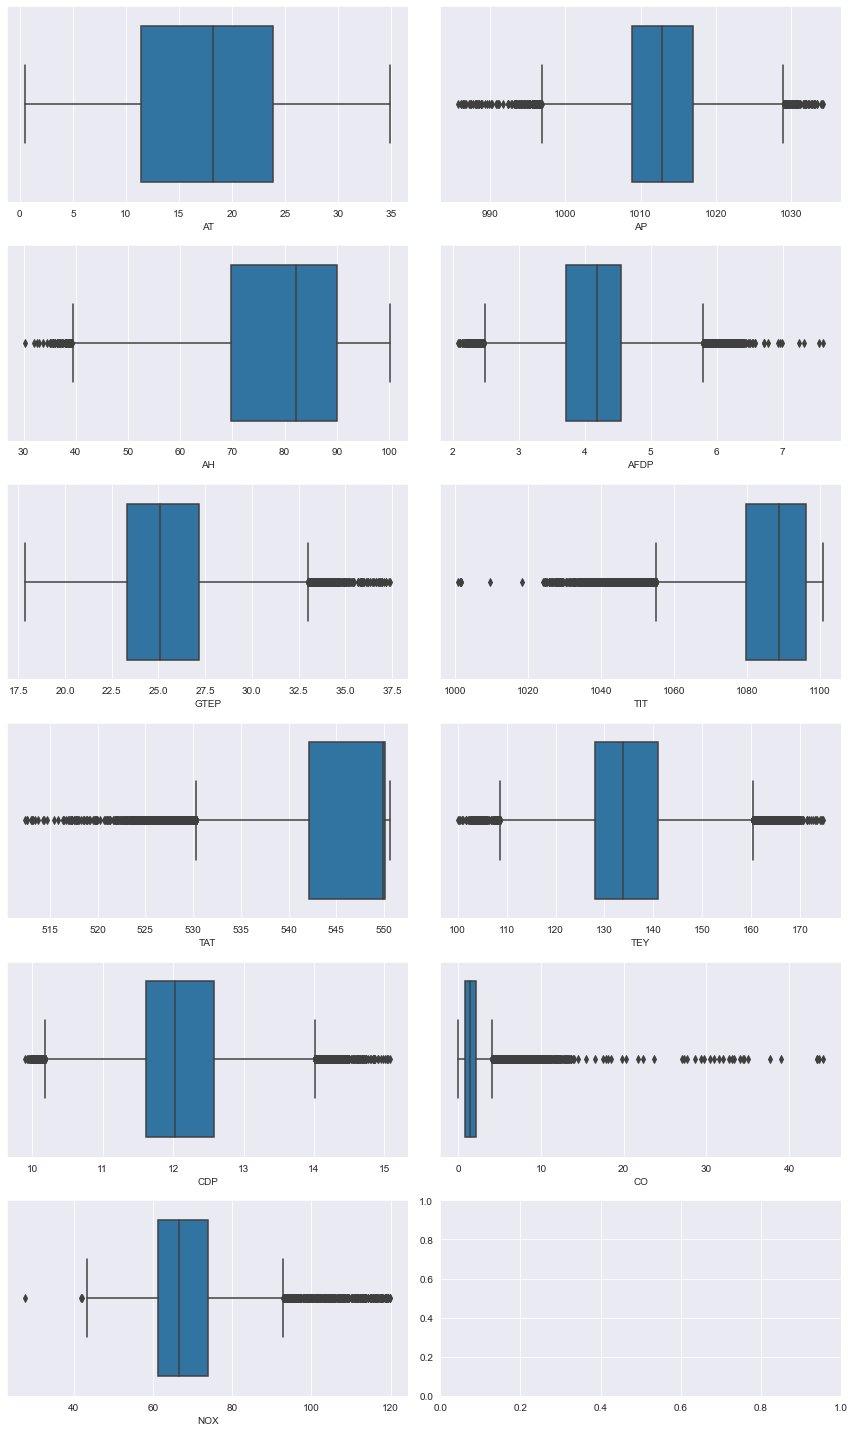

In [64]:
# Checking of the outlier
fig, ax = plt.subplots(6,2, figsize = (12,20))

sns.boxplot(turbines_data.AT, ax = ax[0,0])
sns.boxplot(turbines_data.AP, ax = ax[0,1])
sns.boxplot(turbines_data.AH, ax = ax[1,0])
sns.boxplot(turbines_data.AFDP, ax = ax[1,1])
sns.boxplot(turbines_data.GTEP, ax = ax[2,0])
sns.boxplot(turbines_data.TIT, ax = ax[2,1])
sns.boxplot(turbines_data.TAT, ax = ax[3,0])
sns.boxplot(turbines_data.TEY, ax = ax[3,1])
sns.boxplot(turbines_data.CDP, ax = ax[4,0])
sns.boxplot(turbines_data.CO, ax = ax[4,1])
sns.boxplot(turbines_data.NOX, ax = ax[5,0])

plt.tight_layout()
plt.show()

There are many outliers present in the data.

# Extrating the independent and dependent variables

In [65]:
turbines_data["TEy"] = 1
turbines_data.loc[turbines_data["TEY"] > 135,"TEy"] = 2
turbines_data.drop(["TEY"],axis = 1,inplace = True)

In [66]:
x = np.array(turbines_data.iloc[:,0:10])
x

array([[   6.8594, 1007.9   ,   96.799 , ...,   10.605 ,    3.1547,
          82.722 ],
       [   6.785 , 1008.4   ,   97.118 , ...,   10.598 ,    3.2363,
          82.776 ],
       [   6.8977, 1008.8   ,   95.939 , ...,   10.601 ,    3.2012,
          82.468 ],
       ...,
       [   7.2647, 1006.3   ,   99.496 , ...,   10.483 ,    7.9632,
          90.912 ],
       [   7.006 , 1006.8   ,   99.008 , ...,   10.533 ,    6.2494,
          93.227 ],
       [   6.9279, 1007.2   ,   97.533 , ...,   10.583 ,    4.9816,
          92.498 ]])

In [67]:
y = np.array(turbines_data.iloc[:,10])
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
# Normalizing data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [69]:
x_norm = norm_func(x)

# Train and Test split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x_norm,y, test_size = 0.2)

# Applying Neural Network

In [71]:
model = Sequential()

In [72]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [73]:
model.add(Dense(8, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(4,  kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))

In [74]:
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])

In [75]:
model.fit(x_train,y_train, validation_split = 0.3, epochs = 50, batch_size = 10)

Epoch 1/50
843/843 [==============================] - 1s 1ms/step - loss: 0.5185 - accuracy: 0.5549 - val_loss: 0.2024 - val_accuracy: 0.7158
Epoch 2/50
843/843 [==============================] - 1s 894us/step - loss: 0.2086 - accuracy: 0.7012 - val_loss: 0.2022 - val_accuracy: 0.7158
Epoch 3/50
843/843 [==============================] - 1s 880us/step - loss: 0.2076 - accuracy: 0.7012 - val_loss: 0.2059 - val_accuracy: 0.7158
Epoch 4/50
843/843 [==============================] - 1s 886us/step - loss: 0.2069 - accuracy: 0.7012 - val_loss: 0.2003 - val_accuracy: 0.7158
Epoch 5/50
843/843 [==============================] - 1s 907us/step - loss: 0.2062 - accuracy: 0.7012 - val_loss: 0.1990 - val_accuracy: 0.7158
Epoch 6/50
843/843 [==============================] - 1s 889us/step - loss: 0.2048 - accuracy: 0.7012 - val_loss: 0.1982 - val_accuracy: 0.7158
Epoch 7/50
843/843 [==============================] - 1s 884us/step - loss: 0.2040 - accuracy: 0.7012 - val_loss: 0.1987 - val_accuracy: 0

In [76]:
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

376/376 [==============================] - 0s 595us/step - loss: 0.0614 - accuracy: 0.7056
accuracy: 70.56%


In [77]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

94/94 [==============================] - 0s 618us/step - loss: 0.0641 - accuracy: 0.6935
accuracy: 69.35%


# Visualize training history

In [78]:
history = model.fit(x_train,y_train, validation_split = 0.3, epochs = 50, batch_size = 10)

Epoch 1/50
843/843 [==============================] - 1s 948us/step - loss: 0.0624 - accuracy: 0.7012 - val_loss: 0.0601 - val_accuracy: 0.7158
Epoch 2/50
843/843 [==============================] - 1s 912us/step - loss: 0.0625 - accuracy: 0.7012 - val_loss: 0.0616 - val_accuracy: 0.7158
Epoch 3/50
843/843 [==============================] - 1s 911us/step - loss: 0.0621 - accuracy: 0.7012 - val_loss: 0.0596 - val_accuracy: 0.7158
Epoch 4/50
843/843 [==============================] - 1s 901us/step - loss: 0.0620 - accuracy: 0.7012 - val_loss: 0.0638 - val_accuracy: 0.7158
Epoch 5/50
843/843 [==============================] - 1s 907us/step - loss: 0.0620 - accuracy: 0.7012 - val_loss: 0.0674 - val_accuracy: 0.7158
Epoch 6/50
843/843 [==============================] - 1s 906us/step - loss: 0.0619 - accuracy: 0.7012 - val_loss: 0.0591 - val_accuracy: 0.7158
Epoch 7/50
843/843 [==============================] - 1s 910us/step - loss: 0.0621 - accuracy: 0.7012 - val_loss: 0.0592 - val_accuracy:

In [79]:
# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# summarize history for accuracy and Loss 

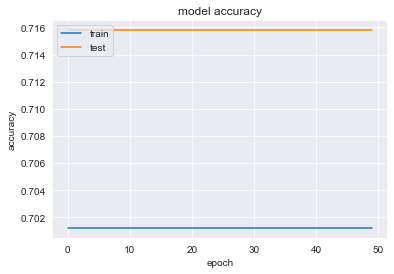

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

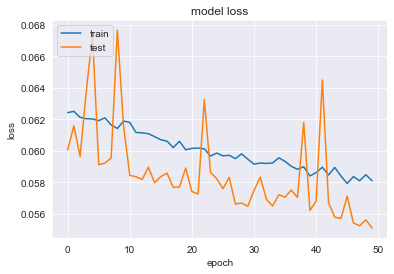

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

# Tuning of Hyperparameter : Batch Size and Epochs

In [82]:
from tensorflow.keras.models import load_model

In [83]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim = 10, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(8,  kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(1,  kernel_initializer = 'uniform', activation = 'linear'))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'mse', optimizer = adam, metrics = ['accuracy'])
    return model

# Create the model

In [84]:
model_1 = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

In [85]:
batch_size = [10,20,40]
epochs = [10,50,100]

# Make a dictionary of the grid search parameters

In [86]:
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV

In [87]:
grid = GridSearchCV(estimator = model_1, param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.913 total time=   6.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.939 total time=   6.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.683 total time=   6.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.934 total time=   6.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.722 total time=   6.1s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

# Conclusion :
* The train accuracy for the model is 0.7024 and test accuracy for the model is 0.7064
* Both train and test accuracies are comparable and good and hence is a good model to predict.